In [2]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict, List, Dict, Any

In [3]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    result : int
    operation : str

In [4]:
def adder(state: AgentState) -> AgentState:
    """This node add 2 numbers"""

    state["result"] = state["number1"] + state["number2"]
    return state

def subbtractor(state: AgentState) -> AgentState:
    """This node subt 2 numbers"""

    state["result"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> str:
    """This node decide which node to go next"""

    if state["operation"] == "+":
        return "adder"
    elif state["operation"] == "-":
        return "subbtractor"
    else:
        raise ValueError("Unknown operation")

In [6]:
graph = StateGraph(AgentState)

graph.add_node('add', adder)
graph.add_node('sub', subbtractor)
graph.add_node('decide', lambda state:state) #pass through funstion, as we dont assign anything we just compare the operation

graph.add_edge(START, 'decide')

graph.add_conditional_edges(
    'decide',
    decide_next_node,
    {
        'adder': 'add',
        'subbtractor': 'sub'
    }

) #Add conditional edges based on the operation

graph.add_edge('add', END)
graph.add_edge('sub', END)
app = graph.compile()

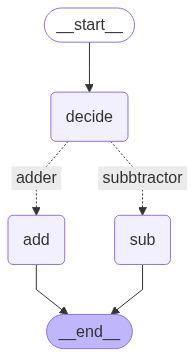

In [7]:
from IPython.display import display , Image
draw_mermaid_png = app.get_graph().draw_mermaid_png
display(Image(draw_mermaid_png())) #Display the graph as a mermaid diagram


In [ ]:
initial_state_1 = AgentState(
    number1=10,
    number2=5,
    operation= '+') #another qay to invoke the graph
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'result': 15, 'operation': '+'}
